<a href="https://colab.research.google.com/github/antoniogss/air_quality/blob/main/ets_decomposition_covs_pin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#@title
import pandas as pd
import numpy as np
import warnings as war
import google.colab as gc
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
import matplotlib.dates as mdates

from google.colab import files #Upload files into the notebook
from glob import glob
from datetime import date, time, datetime, timedelta
from functools import reduce
from matplotlib import dates, rcParams
from scipy.stats import linregress
from sklearn import linear_model
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.impute import KNNImputer
from pylab import rcParams
rcParams['figure.figsize'] = 30,10

#Ignore harmeless warnings
war.filterwarnings('ignore')

gc.output.clear()

In [2]:
gc.drive.mount('./gdrive/', 
               force_remount=True
              )

gc.output.clear()

In [3]:
%cd ./gdrive/MyDrive/air_quality/datasets/COVs/

dir = '/content/gdrive/MyDrive/air_quality/images/'

/content/gdrive/MyDrive/air_quality/datasets/COVs


In [17]:
pin_month_covs = pd.read_csv('pin_month_covs.csv', parse_dates=['data_hora'])
pin_month_covs.drop('Unnamed: 0', axis=1,inplace=True)
pin_month_covs.set_index(pin_month_covs.columns[0], inplace=True)

In [34]:
pin_month_covs.head()

,benzeno,tolueno,mes
data_hora,,,
2017-01-31,0.704412,3.247059,Janeiro
2017-02-28,0.821940,4.561208,Fevereiro
2017-03-31,0.534789,3.859482,Março
2017-04-30,0.386525,3.115248,Abril
2017-05-31,0.805405,5.129730,Maio


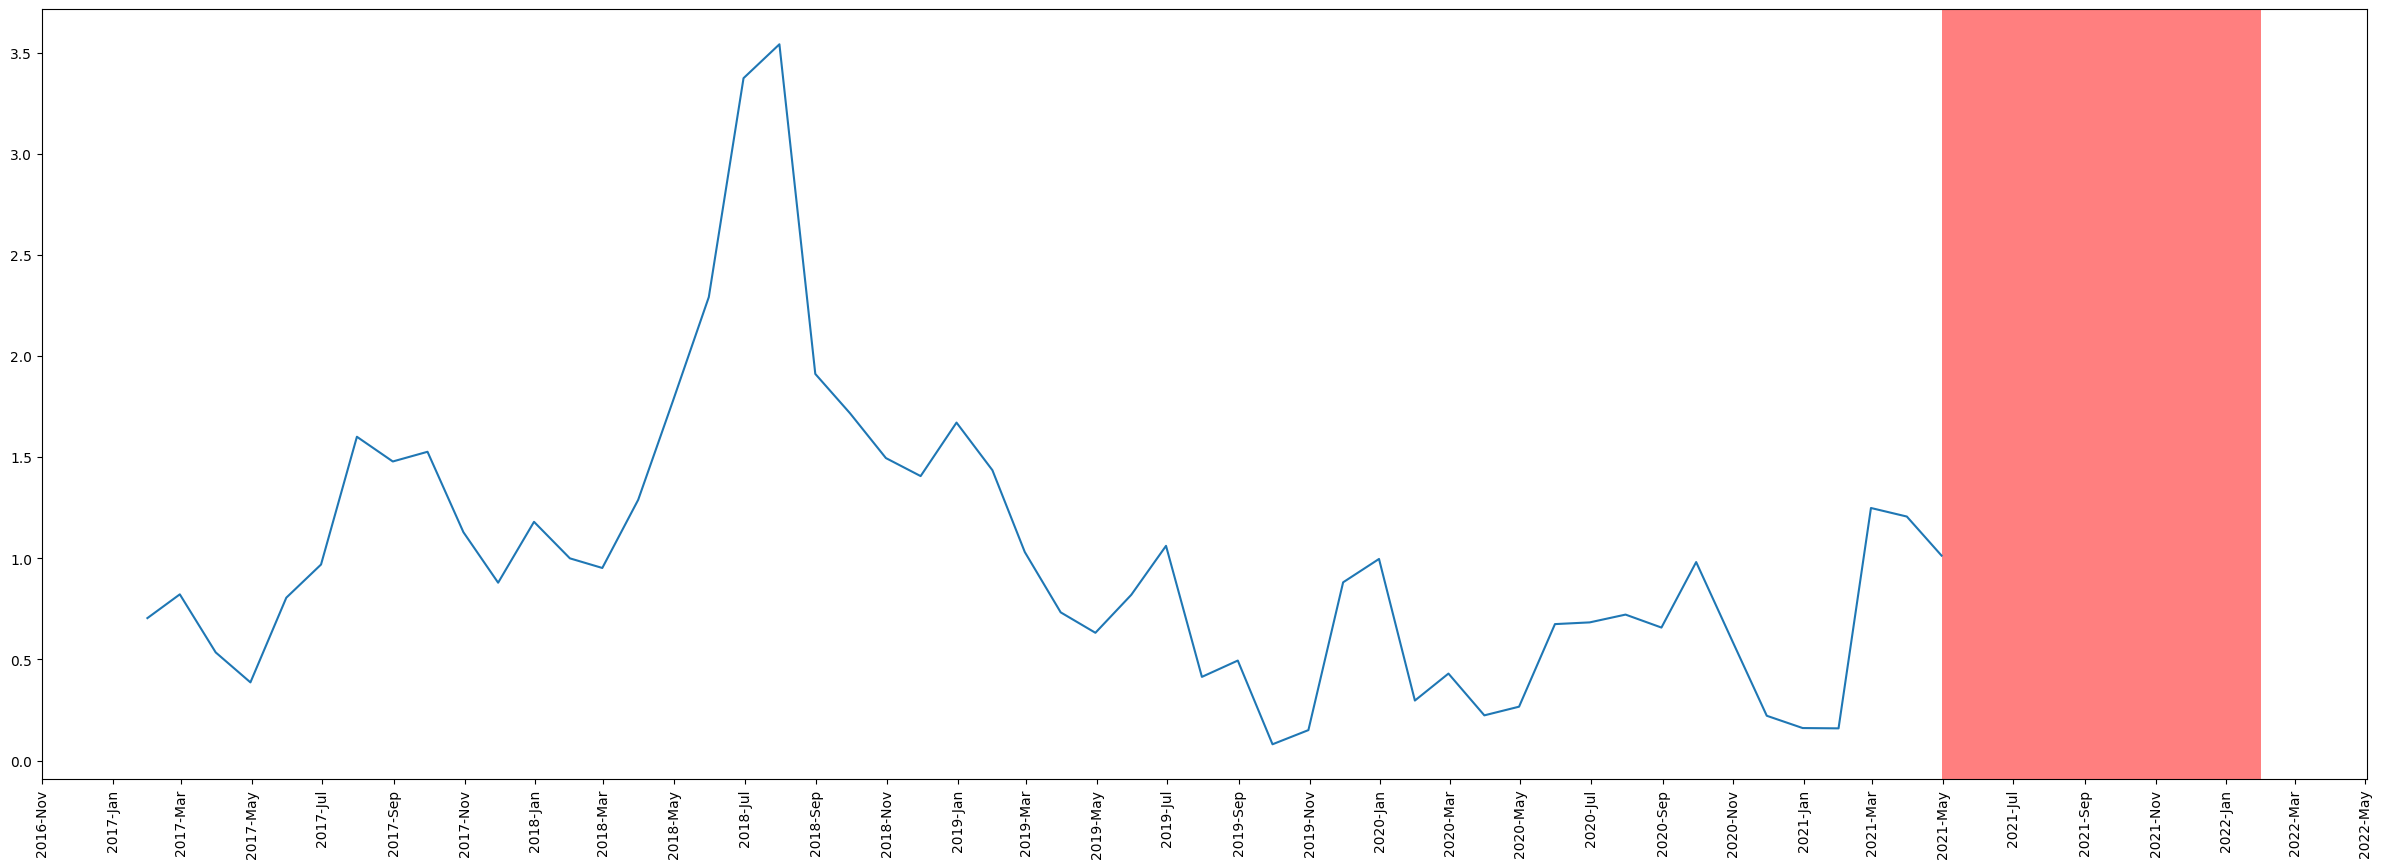

In [24]:
## Benzeno

df = pin_month_covs

# plt.figure(figsize=(30,10))

ax = plt.gca()
# start by your date and then your data
ax.plot(df.index,df["benzeno"]) # daily data
# You can change the step of range() as you prefer (now, it selects each third month) 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,2)))
# you can change the format of the label (now it is 2016-Jan)  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.setp(ax.get_xticklabels(), rotation=90) 

#code to find the start index and stop index of the groups of NaNs
#resuls in list which contains lists of each gap start and stop datetime
#code to find the start index and stop index of the group of NaNs

is_nan = df['benzeno'].isna()
n_groups = is_nan.ne(is_nan.shift()).cumsum()
gap_list = df[is_nan].groupby(n_groups).aggregate(
    lambda x: (
        pd.to_datetime(x.index[0]) + pd.DateOffset(months=-1),
        pd.to_datetime(x.index[-1]) + pd.DateOffset(months=+1)
    )
)['benzeno'].values

# results in a list which contains tuples of each gap start and stop datetime

gaps = gap_list

# plt.plot(df['benzeno']);

for gap in gaps: 
    ax.axvspan(gap[0], gap[1], facecolor='r', alpha=0.5)

plt.show()

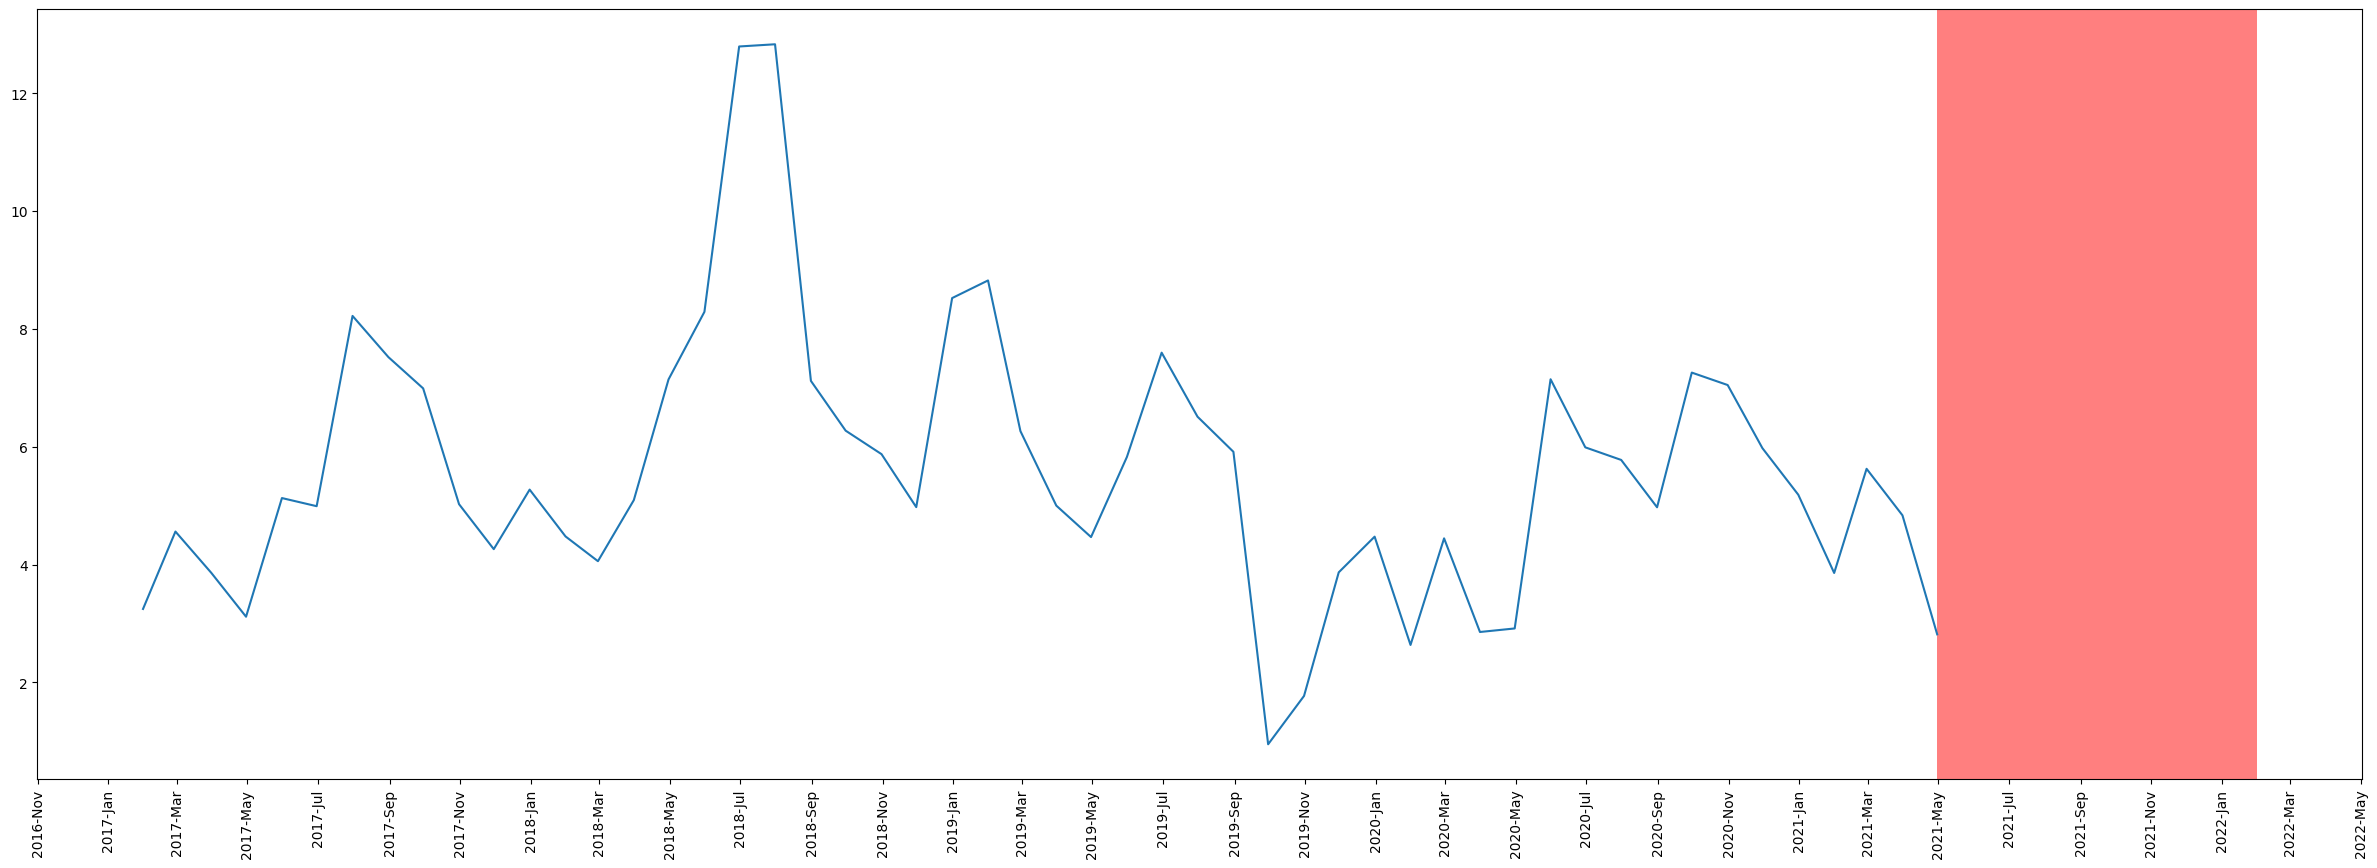

In [25]:
## Tolueno

df = pin_month_covs

# plt.figure(figsize=(30,10))

ax = plt.gca()
# start by your date and then your data
ax.plot(df.index,df["tolueno"]) # daily data
# You can change the step of range() as you prefer (now, it selects each third month) 
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,12,2)))
# you can change the format of the label (now it is 2016-Jan)  
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
plt.setp(ax.get_xticklabels(), rotation=90) 

#code to find the start index and stop index of the groups of NaNs
#resuls in list which contains lists of each gap start and stop datetime
#code to find the start index and stop index of the group of NaNs

is_nan = df['tolueno'].isna()
n_groups = is_nan.ne(is_nan.shift()).cumsum()
gap_list = df[is_nan].groupby(n_groups).aggregate(
    lambda x: (
        pd.to_datetime(x.index[0]) + pd.DateOffset(months=-1),
        pd.to_datetime(x.index[-1]) + pd.DateOffset(months=+1)
    )
)['tolueno'].values

# results in a list which contains tuples of each gap start and stop datetime

gaps = gap_list

# plt.plot(df['tolueno']);

for gap in gaps: 
    ax.axvspan(gap[0], gap[1], facecolor='r', alpha=0.5)

plt.show()

In [46]:
covs_interpolated = pin_month_covs['2017-01':'2021-05'].interpolate(method='time')

In [47]:
pin_benz = seasonal_decompose(covs_interpolated['benzeno'], model = 'multiplicative')
pin_tol = seasonal_decompose(covs_interpolated['tolueno'], model = 'multiplicative')

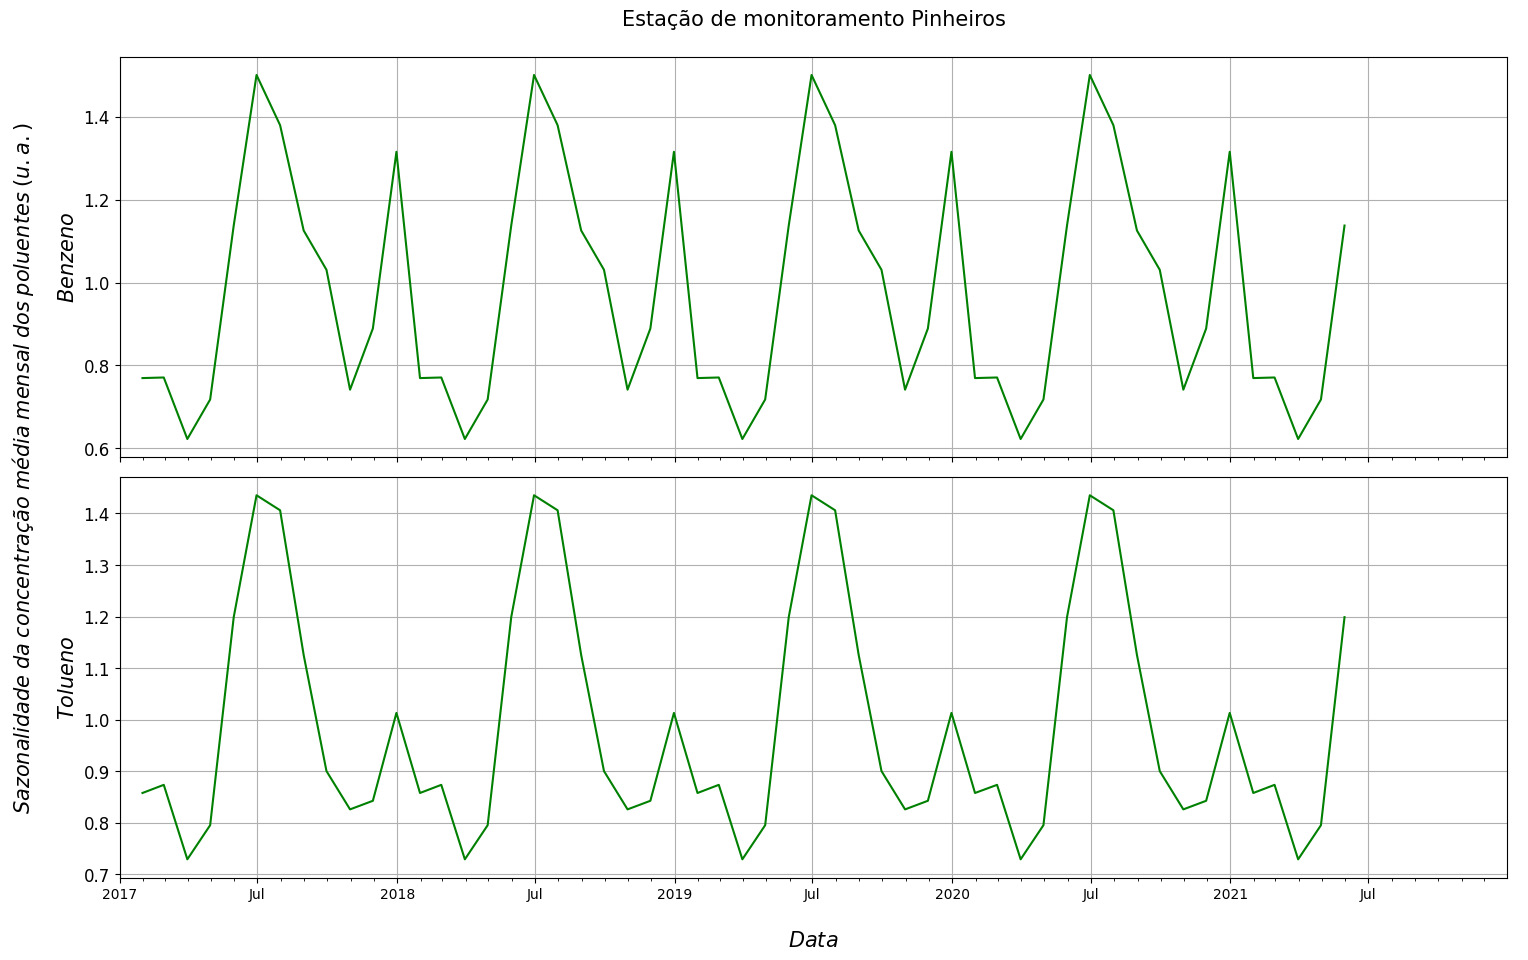

In [48]:
y_1 = pin_benz.seasonal
y_2 = pin_tol.seasonal

fig, (ax1, ax2) = plt.subplots(nrows=2, 
                                         ncols=1, 
                                         sharex=True,
                                        #  sharey=True, 
                                         figsize=(16,10)
                                        )

####

ax1.plot(y_1, label='Capão Redondo', color='green')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(y_2, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')


# ax1.legend()
# ax1.set_title('$O_{3}$',fontsize=15)
ax1.set_title('Estação de monitoramento Pinheiros\n',fontsize=15)
ax1.set_ylabel('$Benzeno$',fontsize=15)
ax1.set_xlim([dt.datetime(2017,1,1),dt.datetime(2021,12,31)], auto=True)

# ax2.legend()
# ax2.set_title('$NO$',fontsize=15)
ax2.set_ylabel('$Tolueno$',fontsize=15)
ax2.set_xlim([dt.datetime(2017,1,1),dt.datetime(2021,12,31)], auto=True)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', 
                which='both', 
                top=False, 
                bottom=False, 
                left=False, 
                right=False)

plt.xlabel("\n$Data$",fontsize=15)
plt.ylabel("$Sazonalidade\;da\;concentração\;média\;mensal\;dos\;poluentes\;(u.a.)$\n\n",fontsize=15)

plt.setp([ax1.get_yticklabels(),
          ax2.get_yticklabels()], 
         fontsize=12
         )


plt.tight_layout()

plt.savefig(
              dir + 'pin_ets_benz_tol_seasonality.jpg',
              transparent = True,
              bbox_inches = 'tight',
              dpi = 100              
            )

plt.show()

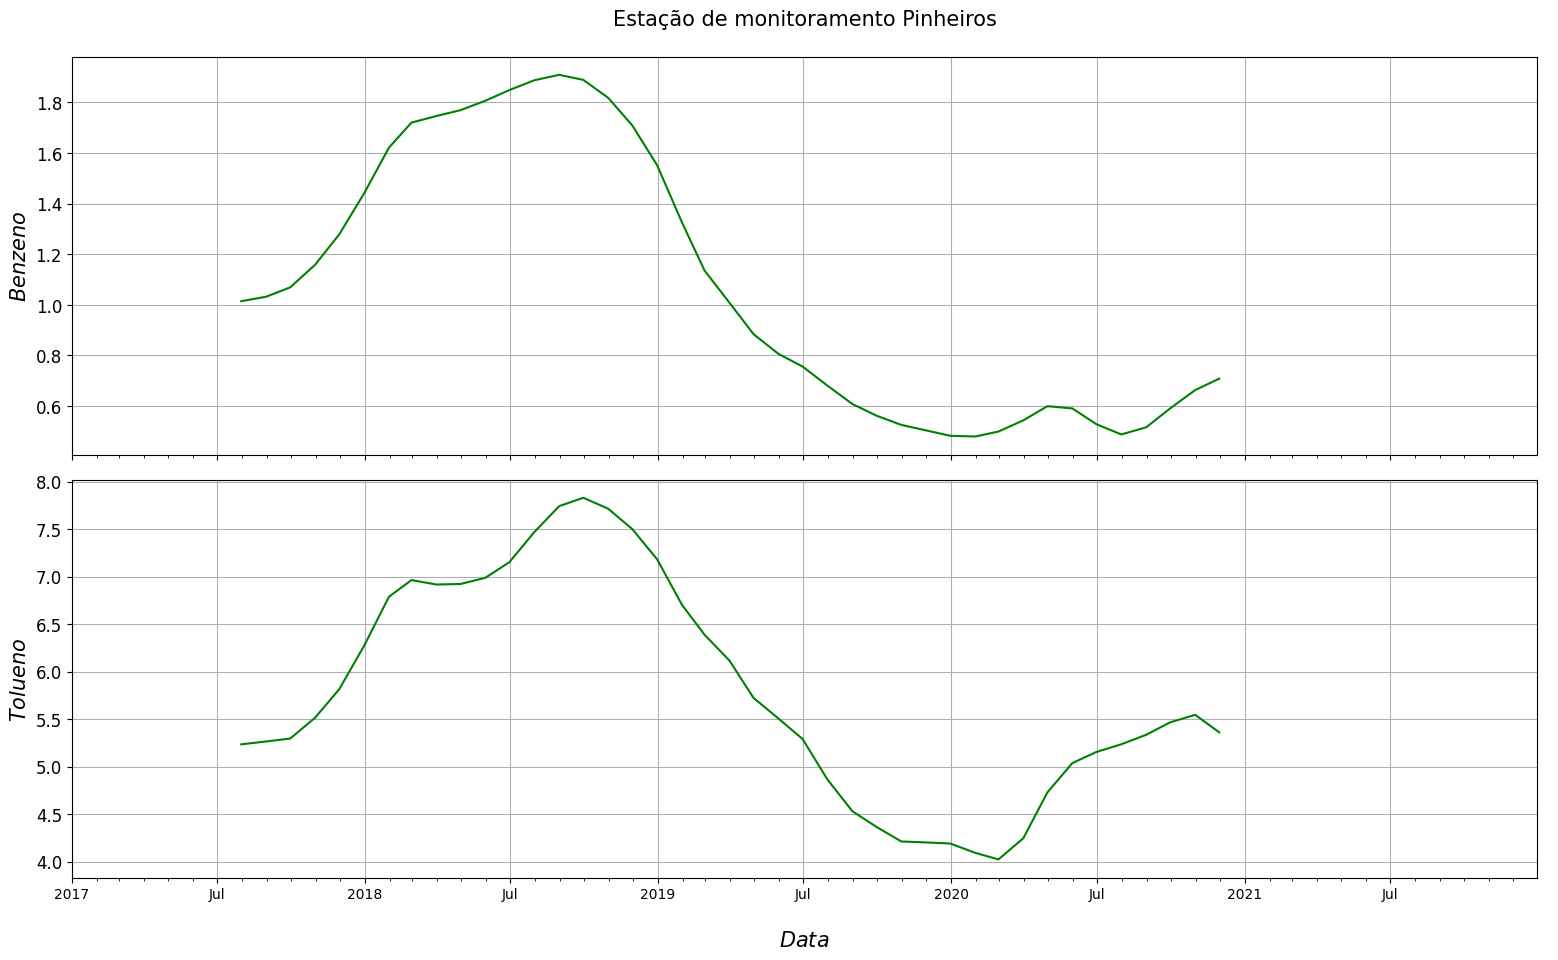

In [51]:
y_1 = pin_benz.trend
y_2 = pin_tol.trend

fig, (ax1, ax2) = plt.subplots(nrows=2, 
                                         ncols=1, 
                                         sharex=True,
                                        #  sharey=True, 
                                         figsize=(16,10)
                                        )

####

ax1.plot(y_1, label='Capão Redondo', color='green')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(y_2, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')


# ax1.legend()
# ax1.set_title('$O_{3}$',fontsize=15)
ax1.set_title('Estação de monitoramento Pinheiros\n',fontsize=15)
ax1.set_ylabel('$Benzeno$',fontsize=15)
ax1.set_xlim([dt.datetime(2017,1,1),dt.datetime(2021,12,31)], auto=True)

# ax2.legend()
# ax2.set_title('$NO$',fontsize=15)
ax2.set_ylabel('$Tolueno$',fontsize=15)
ax2.set_xlim([dt.datetime(2017,1,1),dt.datetime(2021,12,31)], auto=True)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', 
                which='both', 
                top=False, 
                bottom=False, 
                left=False, 
                right=False)

plt.xlabel("\n$Data$",fontsize=15)
# plt.ylabel("$Sazonalidade\;da\;concentração\;média\;mensal\;dos\;poluentes\;(u.a.)$\n\n",fontsize=15)

plt.setp([ax1.get_yticklabels(),
          ax2.get_yticklabels()], 
         fontsize=12
         )


plt.tight_layout()

plt.savefig(
              dir + 'pin_ets_benz_tol_trend.jpg',
              transparent = True,
              bbox_inches = 'tight',
              dpi = 100              
            )

plt.show()

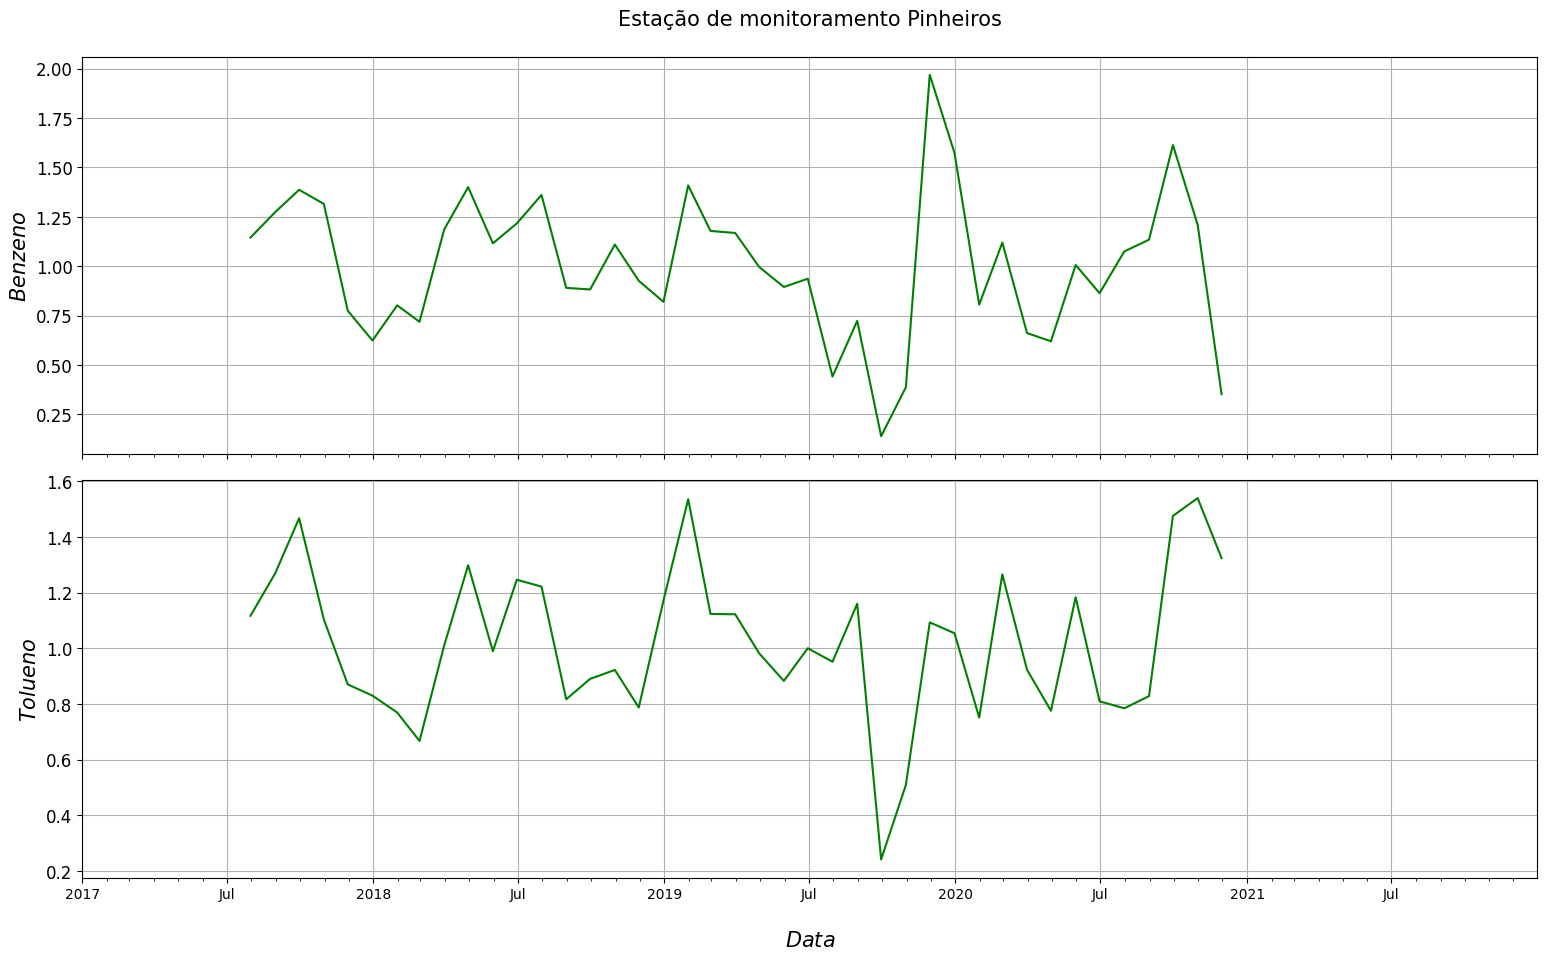

In [52]:
y_1 = pin_benz.resid
y_2 = pin_tol.resid

fig, (ax1, ax2) = plt.subplots(nrows=2, 
                                         ncols=1, 
                                         sharex=True,
                                        #  sharey=True, 
                                         figsize=(16,10)
                                        )

####

ax1.plot(y_1, label='Capão Redondo', color='green')

# Major ticks every half year, minor ticks every month

ax1.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax1.xaxis.set_minor_locator(dates.MonthLocator())

ax1.grid(True)

ax1.set_ylabel(r'')

ax1.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

# Rotates and right-aligns the x labels so they don't crowd each other.

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')

####

ax2.plot(y_2, label='Ibirapuera', color='green')

ax2.xaxis.set_major_locator(dates.MonthLocator(bymonth=(1, 7)))

ax2.xaxis.set_minor_locator(dates.MonthLocator())

ax2.grid(True)

ax2.set_ylabel(r'')

ax2.xaxis.set_major_formatter(
    dates.ConciseDateFormatter(ax.xaxis.get_major_locator())) 

for label in ax.get_xticklabels(which='major'):

    label.set(rotation=30, horizontalalignment='right')


# ax1.legend()
# ax1.set_title('$O_{3}$',fontsize=15)
ax1.set_title('Estação de monitoramento Pinheiros\n',fontsize=15)
ax1.set_ylabel('$Benzeno$',fontsize=15)
ax1.set_xlim([dt.datetime(2017,1,1),dt.datetime(2021,12,31)], auto=True)

# ax2.legend()
# ax2.set_title('$NO$',fontsize=15)
ax2.set_ylabel('$Tolueno$',fontsize=15)
ax2.set_xlim([dt.datetime(2017,1,1),dt.datetime(2021,12,31)], auto=True)

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', 
                which='both', 
                top=False, 
                bottom=False, 
                left=False, 
                right=False)

plt.xlabel("\n$Data$",fontsize=15)
# plt.ylabel("$Sazonalidade\;da\;concentração\;média\;mensal\;dos\;poluentes\;(u.a.)$\n\n",fontsize=15)

plt.setp([ax1.get_yticklabels(),
          ax2.get_yticklabels()], 
         fontsize=12
         )


plt.tight_layout()

plt.savefig(
              dir + 'pin_ets_benz_tol_residual.jpg',
              transparent = True,
              bbox_inches = 'tight',
              dpi = 100              
            )

plt.show()